### Basel credit risk
#### 1. The quantile function, the cdf and pdf of the credit portfolio Loss:

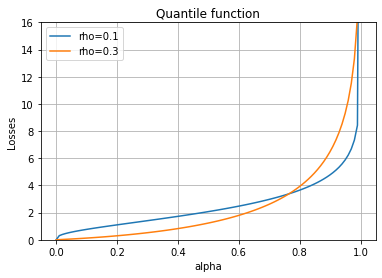

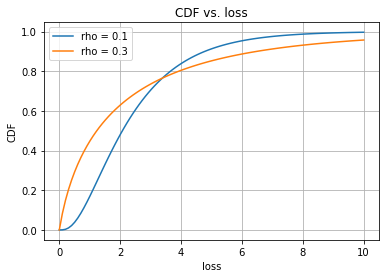

<ipython-input-2-8492df425b75>:58: RuntimeWarning: invalid value encountered in true_divide
  return norm.cdf(norm.ppf(S))/(100*EAD*LGD*np.sqrt(asset_correlation/(1-asset_correlation))*norm.cdf((pr + norm.ppf(S) * np.sqrt(asset_correlation)) / np.sqrt(1 - asset_correlation)))


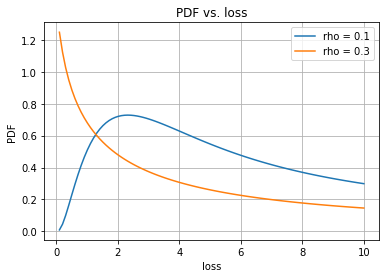

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import bisect


# Quantile function:

EAD = 1  # Exposure at Default
LGD = 0.5  # Expected Loss Given Default
pr = 0.05  # Probability of Default
alpha = np.linspace(0, 1, num=100)  # Confidence level range
rho_values = [0.1, 0.3]

for rho in rho_values:
    cdf_values = 100*LGD*EAD*norm.cdf((norm.ppf(pr) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
    plt.plot(alpha, cdf_values, label=f"rho={rho}")
plt.ylim(0, 16)
plt.xlabel('alpha')
plt.ylabel('Losses')
plt.title('Quantile function')
plt.legend()
plt.grid(True)
plt.show()


# Cumulative distribution function (by bisection)

default_probability = 0.05
asset_correlations = [0.1, 0.3]
LGD = 0.5
EAD = 1
loss = np.linspace(0, 10, 100)

def portfolio_loss_distribution(S, asset_correlation):
    rho_star = norm.ppf(default_probability)
    return 100*EAD*LGD*norm.cdf((rho_star + norm.ppf(S) * np.sqrt(asset_correlation)) / np.sqrt(1 - asset_correlation))

# the inverse of the portfolio loss distribution function
def inverse_portfolio_loss_distribution(l, asset_correlation):
    return bisect(lambda S: portfolio_loss_distribution(S, asset_correlation) - l, 0, 10)

for asset_correlation in asset_correlations:
    inverse_cdf_values = [inverse_portfolio_loss_distribution(l, asset_correlation) for l in loss]
    plt.plot(loss, inverse_cdf_values, label=f"rho = {asset_correlation}")

plt.xlabel('loss')
plt.ylabel('CDF')
plt.title('CDF vs. loss')
plt.legend()
plt.grid(True)
plt.show()

# Probability density function

def density_fun(S):
    pr = norm.ppf(default_probability)
    return norm.cdf(norm.ppf(S))/(100*EAD*LGD*np.sqrt(asset_correlation/(1-asset_correlation))*norm.cdf((pr + norm.ppf(S) * np.sqrt(asset_correlation)) / np.sqrt(1 - asset_correlation)))



for asset_correlation in asset_correlations:
    inverse_cdf_values = [inverse_portfolio_loss_distribution(l, asset_correlation) for l in loss]
   
    plt.plot(loss,density_fun(inverse_cdf_values), label=f"rho = {asset_correlation}")
plt.xlabel('loss')
plt.ylabel('PDF')
plt.title('PDF vs. loss')
plt.legend()
plt.grid(True)
plt.show()

#### 2. The sensitivity of the risk contribution to parameter changes:

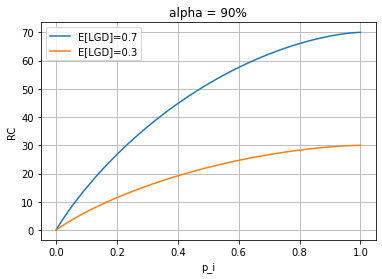

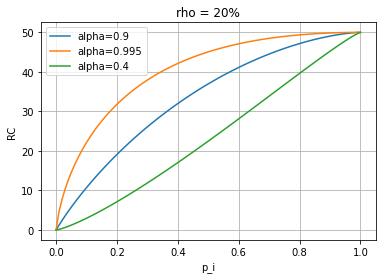

<ipython-input-54-e271ce6b2fb9>:40: RuntimeWarning: divide by zero encountered in true_divide
  RC_i = EAD*lgd*norm.cdf((norm.ppf(p) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
<ipython-input-54-e271ce6b2fb9>:40: RuntimeWarning: invalid value encountered in true_divide
  RC_i = EAD*lgd*norm.cdf((norm.ppf(p) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))


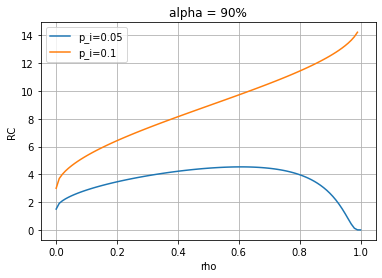

<ipython-input-54-e271ce6b2fb9>:56: RuntimeWarning: divide by zero encountered in true_divide
  RC_i = EAD*lgd*norm.cdf((norm.ppf(p) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))


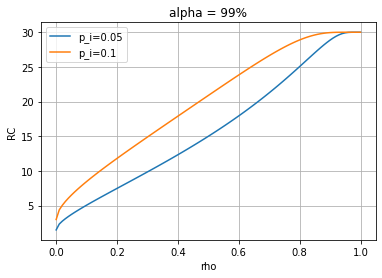

In [54]:
LGDs = [0.7,0.3]
rho = 0.2
EAD = 100
alpha = 0.9
p_i = np.linspace(0 , 1 , 100)

for lgd in LGDs:
    RC_i = EAD*lgd*norm.cdf((norm.ppf(p_i) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
    plt.plot(p_i, RC_i, label=f"E[LGD]={lgd}")
plt.xlabel('p_i')
plt.ylabel('RC')
plt.title('alpha = 90%')
plt.legend()
plt.grid(True)
plt.show()

LGDs = 0.7
rho = 0.2
EAD = 100
alphas = [0.9,0.995,0.4]
p_i = np.linspace(0 , 1 , 100)

for alpha in alphas:
    RC_i = EAD*LGD*norm.cdf((norm.ppf(p_i) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
    plt.plot(p_i, RC_i, label=f"alpha={alpha}")
plt.xlabel('p_i')
plt.ylabel('RC')
plt.title('rho = 20%')
plt.legend()
plt.grid(True)
plt.show()

LGDs = 0.7
p_i = [0.05,0.1]
EAD = 100
alpha = 0.9
rho = np.linspace(0 , 1 , 100)

for p in p_i:
    RC_i = EAD*lgd*norm.cdf((norm.ppf(p) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
    plt.plot(rho, RC_i, label=f"p_i={p}")
plt.xlabel('rho')
plt.ylabel('RC')
plt.title('alpha = 90%')
plt.legend()
plt.grid(True)
plt.show()

LGDs = 0.7
p_i = [0.05,0.1]
EAD = 100
alpha = 0.99
rho = np.linspace(0 , 1 , 100)

for p in p_i:
    RC_i = EAD*lgd*norm.cdf((norm.ppf(p) + norm.ppf(alpha) * np.sqrt(rho)) / np.sqrt(1 - rho))
    plt.plot(rho, RC_i, label=f"p_i={p}")
plt.xlabel('rho')
plt.ylabel('RC')
plt.title('alpha = 99%')
plt.legend()
plt.grid(True)
plt.show()


### Loss given default estimation

In this section we need better statistical tools not found in python, to my knowledge, the MLE for example. So we used R, the code and plots will be encluded in the report.

### Default Probability
#### 1. The hazard function under the exponential, the Gompertz and the piecewise exponential assumptions:

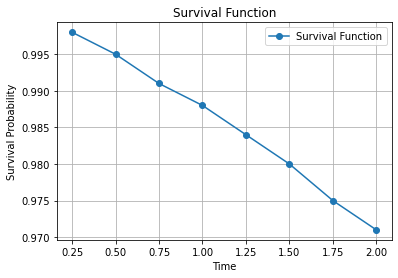

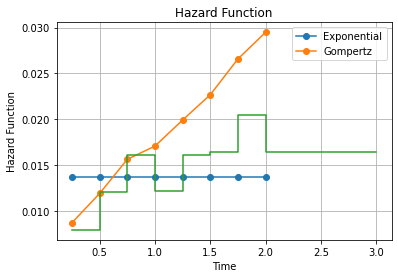

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Survival probabilities
survival_probs = np.array([0.998, 0.995, 0.991, 0.988, 0.984, 0.980, 0.975, 0.971])
time = np.array([0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00])

# Exponential model
X = np.vstack((time, np.zeros_like(time))).T
y = -np.log(survival_probs)
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
lambda_hat_exp = beta_hat[0]
hazard_exp = np.full_like(time, lambda_hat_exp)

# Gompertz model
lambda_hat_gompertz = -np.log(survival_probs) / time
gamma_hat_gompertz = np.log(lambda_hat_gompertz[-1] / lambda_hat_gompertz[0]) / (time[-1] - time[0])
hazard_gompertz = lambda_hat_gompertz * np.exp(gamma_hat_gompertz * time)

# Piecewise exponential model
time_intervals = np.array([0.25,0.49, 0.50, 0.74, 0.75,0.99, 1.00, 1.24, 1.25, 1.49, 1.50, 1.74, 1.75, 1.99, 2.00, 2.50, 3.00])
lambda_hat_piecewise = np.array([0.00796,0.00796, 0.01206,0.01206, 0.01611,0.01611, 0.01216,0.01216, 0.01617,0.01617, 0.01640,0.01640, 0.02044,0.02044, 0.01642, 0.01642, 0.01642])
time_points = np.repeat(time_intervals, 2)[1:-1]
hazard_points = np.repeat(lambda_hat_piecewise[:-1], 2)

# Plotting survival functions
plt.plot(time, survival_probs, marker='o', linestyle='-', label='Survival Function')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Function')
plt.legend()
plt.grid(True)
plt.show()

# Plotting hazard functions
plt.plot(time, hazard_exp, marker='o', linestyle='-', label='Exponential')
plt.plot(time, hazard_gompertz, marker='o', linestyle='-', label='Gompertz')
plt.plot(time_points, hazard_points, linestyle='-')
plt.xlabel('Time')
plt.ylabel('Hazard Function')
plt.title('Hazard Function')
plt.legend()
plt.grid(True)
plt.show()


#### 2.i- The piecewise constant hazard function up to 150 years:

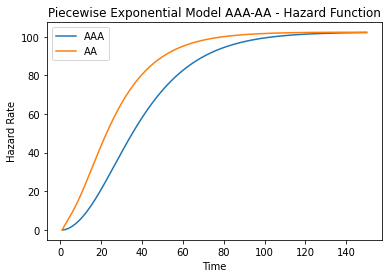

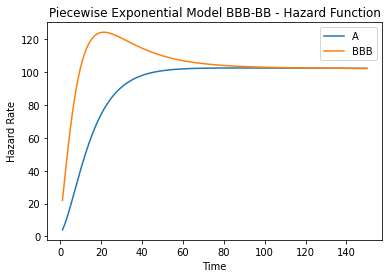

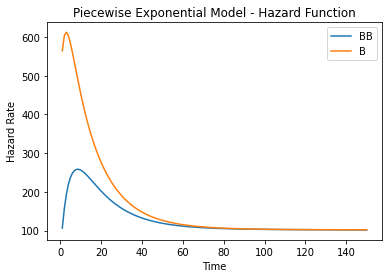

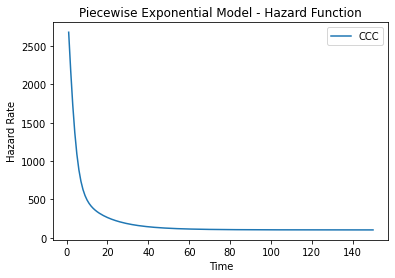

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
transition_matrix = np.array([[0.9282, 0.065, 0.0056, 0.0006, 0.0006, 0.00, 0.00, 0.00],
                             [0.0063, 0.9187, 0.0664, 0.0065, 0.0006, 0.0011, 0.0004, 0.00],
                             [0.0008, 0.0226, 0.9166, 0.0511, 0.0061, 0.0023, 0.0001, 0.0004],
                             [0.0005, 0.0027, 0.0584, 0.8774, 0.0474, 0.0098, 0.0016, 0.0022],
                             [0.0004, 0.001, 0.0064, 0.0785, 0.8114, 0.0827, 0.0089, 0.0106],
                             [0.00, 0.0011, 0.003, 0.0042, 0.0675, 0.8307, 0.0386, 0.0549],
                             [0.0019, 0.00, 0.0038, 0.0075, 0.0244, 0.1203, 0.6071, 0.2350],
                             [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1]])

# Time points
t = np.arange(1, 151)
labels = ["AAA","AA","A","BBB", "BB","B","CCC","D"]

# Function to calculate hazard
def hazard(m, ei, ek):
    num = 1 - np.dot(np.dot(np.transpose(ei), np.linalg.matrix_power(transition_matrix, m - 1)), ek)
    denom = 1 - np.dot(np.dot(np.transpose(ei), np.linalg.matrix_power(transition_matrix, m)), ek)
    return np.log(num / denom)

# Rating states
I1 = np.arange(1, 3)
I2 = np.arange(3, 5)
I3 = np.arange(5, 7)
I4 = np.arange(7, 8)
# Plot hazard function for each rating state
for i in I1:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    hazard_values = np.array([hazard(m, ei, ek) for m in t])
    plt.plot(t, 10000*hazard_values, label=label)
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.title('Piecewise Exponential Model AAA-AA - Hazard Function')
plt.legend()
plt.show()



for i in I2:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    hazard_values = np.array([hazard(m, ei, ek) for m in t])
    plt.plot(t, 10000*hazard_values, label=label)
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.title('Piecewise Exponential Model BBB-BB - Hazard Function')
plt.legend()
plt.show()

for i in I3:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    hazard_values = np.array([hazard(m, ei, ek) for m in t])
    plt.plot(t, 10000*hazard_values, label=label)
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.title('Piecewise Exponential Model - Hazard Function')
plt.legend()
plt.show()

# Add labels and title


for i in I4:
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    hazard_values = np.array([hazard(m, ei, ek) for m in t])
    plt.plot(t, 10000*hazard_values, label=f'CCC')
plt.xlabel('Time')
plt.ylabel('Hazard Rate')
plt.title('Piecewise Exponential Model - Hazard Function')
plt.legend()
plt.show()
# Show plot
plt.show()


#### 2.ii- The Markov Generator: 

In [54]:
import pandas as pd

def matrix_logarithm(B, num_terms=50):
    I = np.eye(B.shape[0])  # Identity matrix of the same shape as B
    result = np.zeros_like(B, dtype=float)  # Initialize the result matrix as float

    # Compute the series summation up to num_terms
    for k in range(1, num_terms + 1):
        term = np.linalg.matrix_power((B - I), k) / k
        result += (-1) ** (k + 1) * term

    return result

Lambda_hat = 10000*matrix_logarithm(transition_matrix)
Lambda_hat_tab = pd.DataFrame(Lambda_hat)
print(Lambda_hat_tab)


            0           1           2            3            4            5  \
0 -747.485903  703.667546   35.211946     3.038092     6.557162    -0.793678   
1   67.944273 -859.314344  722.458804    51.601083     2.566991    10.950629   
2    7.688199  245.591427 -898.158270   567.695265    53.957487    20.647777   
3    5.068140   21.562273  650.212637 -1352.277368   557.639123    85.560683   
4    4.224900    9.057650   41.787023   930.554555 -2159.668331   999.622003   
5   -0.836130   11.877741   30.106215     8.709356   818.313378 -1936.819617   
6   25.109814   -2.872051   44.109421    84.868694   272.048795  1678.688734   
7    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000   

             6            7  
0    -0.215527     0.020702  
1     4.922435    -1.129802  
2    -0.220799     2.801471  
3    16.078070    16.185862  
4    97.348280    75.960919  
5   539.177360   529.515274  
6 -5043.002546  2941.063190  
7     0.000000     0.000000  


In [55]:
def sum_negative_entries(matrix):
    negative_entries = np.where(matrix < 0, matrix, 0)  # Replace non-negative entries with 0
    return np.sum(negative_entries, axis=1)
M = np.diag(sum_negative_entries(Lambda_hat))


def replace_negatives_with_zero(matrix):
    return np.where(matrix < 0, 0, matrix)
N = replace_negatives_with_zero(Lambda_hat)
Lambda_bar = M + N
Lambda_bar_tab = pd.DataFrame(Lambda_bar)
print( Lambda_bar_tab )


            0           1           2            3            4            5  \
0 -748.495108  703.667546   35.211946     3.038092     6.557162     0.000000   
1   67.944273 -860.444146  722.458804    51.601083     2.566991    10.950629   
2    7.688199  245.591427 -898.379068   567.695265    53.957487    20.647777   
3    5.068140   21.562273  650.212637 -1352.277368   557.639123    85.560683   
4    4.224900    9.057650   41.787023   930.554555 -2159.668331   999.622003   
5    0.000000   11.877741   30.106215     8.709356   818.313378 -1937.655747   
6   25.109814    0.000000   44.109421    84.868694   272.048795  1678.688734   
7    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000   

             6            7  
0     0.000000     0.020702  
1     4.922435     0.000000  
2     0.000000     2.801471  
3    16.078070    16.185862  
4    97.348280    75.960919  
5   539.177360   529.515274  
6 -5045.874597  2941.063190  
7     0.000000     0.000000  


In [134]:
I = np.arange(1, 9)
G = (np.abs(np.diag(Lambda_hat)) + np.sum(N, axis = 1)) * np.eye(8)
B = (-1*np.diag(M - Lambda_hat))*np.eye(8)
N_cond = N + (Lambda_hat*np.eye(8))
for i in I:
    if G[i-1,i-1] == 0:
        G[i-1,i-1] = 1
Lambda_tilda = N_cond - B * np.abs(N_cond) * np.linalg.inv(G)
Lambda_tilda_tab = pd.DataFrame(Lambda_tilda)
print(Lambda_tilda_tab)


            0           1           2            3            4            5  \
0 -747.990165  703.667546   35.211946     3.038092     6.557162     0.000000   
1   67.944273 -859.878874  722.458804    51.601083     2.566991    10.950629   
2    7.688199  245.591427 -898.268655   567.695265    53.957487    20.647777   
3    5.068140   21.562273  650.212637 -1352.277368   557.639123    85.560683   
4    4.224900    9.057650   41.787023   930.554555 -2159.668331   999.622003   
5    0.000000   11.877741   30.106215     8.709356   818.313378 -1937.237587   
6   25.109814    0.000000   44.109421    84.868694   272.048795  1678.688734   
7    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000   

             6            7  
0     0.000000     0.020702  
1     4.922435     0.000000  
2     0.000000     2.801471  
3    16.078070    16.185862  
4    97.348280    75.960919  
5   539.177360   529.515274  
6 -5044.438161  2941.063190  
7     0.000000     0.000000  


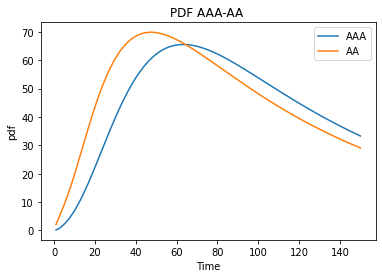

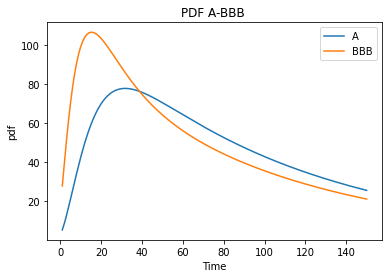

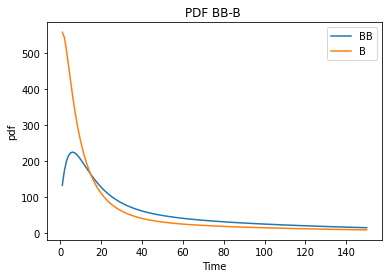

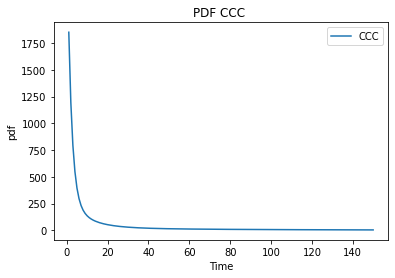

In [156]:
from scipy.linalg import expm

Lambda_tilda_red = Lambda_tilda / 10000
t = np.arange(1, 151)
labels = ["AAA","AA","A","BBB", "BB","B","CCC","D"]

def prob_den_fun(m, ei, ek):
    return np.dot(np.dot(np.dot(np.transpose(ei), Lambda_tilda), expm(m*(Lambda_tilda/10000))),ek)
    
    
# Rating states
I1 = np.arange(1, 3)
I2 = np.arange(3, 5)
I3 = np.arange(5, 7)
I4 = np.arange(7, 8)
# Plot hazard function for each rating state
for i in I1:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    pdf = np.array([prob_den_fun(m, ei, ek) for m in t])
    plt.plot(t, pdf, label=label)
plt.xlabel('Time')
plt.ylabel('pdf')
plt.title('PDF AAA-AA ')
plt.legend()
plt.show()

for i in I2:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    pdf = np.array([prob_den_fun(m, ei, ek) for m in t])
    plt.plot(t, pdf, label=label)
plt.xlabel('Time')
plt.ylabel('pdf')
plt.title('PDF A-BBB ')
plt.legend()
plt.show()

for i in I3:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    pdf = np.array([prob_den_fun(m, ei, ek) for m in t])
    plt.plot(t, pdf, label=label)
plt.xlabel('Time')
plt.ylabel('pdf')
plt.title('PDF BB-B ')
plt.legend()
plt.show()

for i in I4:
    label = labels[i-1]
    ei = np.eye(8)[i-1]
    ek = np.eye(8)[-1]
    pdf = np.array([prob_den_fun(m, ei, ek) for m in t])
    plt.plot(t, pdf, label=label)
plt.xlabel('Time')
plt.ylabel('pdf')
plt.title('PDF CCC ')
plt.legend()
plt.show()

### Default Correlation

Again here the language used for Monte carlo simulations is R.

